<a href="https://colab.research.google.com/github/andrevcmelo/BootcampAlura2021/blob/main/BootcampAlura_ProjetoModulo01_Andr%C3%A9Melo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto do Módulo 01 do Bootcamp Alura em Data Science Aplicada 2020**

**Aluno: [André Victor Costa de Melo](https://https://www.linkedin.com/in/andrevcmelo/)**

O objetivo deste projeto é realizar uma análise exploratória na base de dados do COVID-19 do Brasil.IO.

1. Link da base de dados (baixado em 06-11-2020): https://github.com/andrevcmelo/BootcampAlura2021/blob/main/COVID19-BRASILIO-06-11-2020.csv.gz

2. Link do Brasil.IO: https://brasil.io/home/

3. Link da descrição do dataset: https://github.com/turicas/covid19-br/blob/master/README.md#licen%C3%A7a-e-cita%C3%A7%C3%A3o

Todos os gráficos utilizados neste notebook serão elaborados com a biblioteca `matplotlib`, pois é o conteúdo do Módulo 01 e estarei aproveitando para explorar esta biblioteca. No Módulo 02 explorarei a biblioteca `seaborn`.


### **Resumo**

O objetivo deste projeto é analisar os dados da COVID-19 no Brasil e identificar aspectos relevantes ou curiosos no quesito quantidade de casos e morte, que são os dados disponíveis neste dataset. Não irei cruzar informações com outras bases, pois tentarei explorar ao máximo estes dados para levantar hipóteses, cabendo um segundo momento para confirmação de hipóteses.

### **Análise dos Dados**

#### Importação de Bibliotecas

In [567]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

#Definição do tema dos gráficos do matplotlib
plt.style.use('ggplot')

#### Importação de Dados

In [568]:
file_gzip = ("https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/COVID19-BRASILIO-06-11-2020.csv.gz")

dados = pd.read_csv(file_gzip, compression='gzip',  
                    sep=",", decimal=".",
                   error_bad_lines=False)

#Definindo formato dos registros tipo númerico
pd.options.display.float_format = "{:.2f}".format
#Avaliando as linhas iniciais do dataset
dados.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.00,894470.00,12.00,3493.47,0.02
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.00,894470.00,12.00,3490.11,0.02
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.00,894470.00,12.00,3461.49,0.02
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.00,894470.00,12.00,3460.60,0.02
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.00,894470.00,12.00,3460.26,0.02


In [569]:
dados.tail()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
936865,2020-06-23,SP,Óleo,city,1,0,5,False,2496.00,2471.00,3533809.00,40.47,0.00
936866,2020-06-22,SP,Óleo,city,1,0,4,False,2496.00,2471.00,3533809.00,40.47,0.00
936867,2020-06-21,SP,Óleo,city,1,0,3,False,2496.00,2471.00,3533809.00,40.47,0.00
936868,2020-06-20,SP,Óleo,city,1,0,2,False,2496.00,2471.00,3533809.00,40.47,0.00
936869,2020-06-19,SP,Óleo,city,1,0,1,False,2496.00,2471.00,3533809.00,40.47,0.00


In [570]:
#Verificando as informações sobre o dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936870 entries, 0 to 936869
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            936870 non-null  object 
 1   state                           936870 non-null  object 
 2   city                            930535 non-null  object 
 3   place_type                      936870 non-null  object 
 4   confirmed                       936870 non-null  int64  
 5   deaths                          936870 non-null  int64  
 6   order_for_place                 936870 non-null  int64  
 7   is_last                         936870 non-null  bool   
 8   estimated_population_2019       933215 non-null  float64
 9   estimated_population            933215 non-null  float64
 10  city_ibge_code                  933215 non-null  float64
 11  confirmed_per_100k_inhabitants  919888 non-null  float64
 12  death_rate      

In [571]:
#Quantidade de valores em branco
print(dados.isna().sum())
print('\n')

date                                  0
state                                 0
city                               6335
place_type                            0
confirmed                             0
deaths                                0
order_for_place                       0
is_last                               0
estimated_population_2019          3655
estimated_population               3655
city_ibge_code                     3655
confirmed_per_100k_inhabitants    16982
death_rate                            0
dtype: int64




In [572]:
dados.describe()

,confirmed,deaths,order_for_place,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
count,936870.00,936870.00,936870.00,933215.00,933215.00,933215.00,919888.00,936870.00
mean,1063.58,34.99,87.49,99649.78,100419.54,3187880.28,1025.48,0.04
std,13372.73,508.06,53.40,1038472.32,1046044.50,1003370.52,1349.55,0.09
min,0.00,0.00,1.00,781.00,776.00,11.00,0.00,0.00
25%,11.00,0.00,42.00,6169.00,6171.00,2505279.00,114.78,0.00
50%,58.00,1.00,84.00,13649.00,13742.00,3138708.00,550.25,0.01
75%,253.00,5.00,128.00,30407.00,30747.00,4112306.00,1431.05,0.03
max,1125936.00,39717.00,253.00,45919049.00,46289333.00,5300108.00,22358.37,1.00


#### Tratamento dos dados

Alterando o tipo do campo `date` de *object* para *datetime*

In [573]:
dados['date'] = pd.to_datetime(dados['date'], format="%Y/%m/%d")
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936870 entries, 0 to 936869
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   date                            936870 non-null  datetime64[ns]
 1   state                           936870 non-null  object        
 2   city                            930535 non-null  object        
 3   place_type                      936870 non-null  object        
 4   confirmed                       936870 non-null  int64         
 5   deaths                          936870 non-null  int64         
 6   order_for_place                 936870 non-null  int64         
 7   is_last                         936870 non-null  bool          
 8   estimated_population_2019       933215 non-null  float64       
 9   estimated_population            933215 non-null  float64       
 10  city_ibge_code                  933215 non-null  float64

De acordo com a documentação, o campo `place_type` está subdividido em Estado e Cidade. Irei dividir em 2 datasets, um para a visão por Estados e outro para a visão por Cidades.

In [574]:
#dados_estado -> Estados
dados_estado = dados[dados['place_type']=='state'].reset_index(drop=True)
dados_estado.set_index('date')
dados_estado.head(5)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.00,894470.00,12.00,3493.47,0.02
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.00,894470.00,12.00,3490.11,0.02
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.00,894470.00,12.00,3461.49,0.02
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.00,894470.00,12.00,3460.60,0.02
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.00,894470.00,12.00,3460.26,0.02


In [575]:
#Quantidade de valores em branco no dataset dos Estados
print(dados_estado.isna().sum())
print('\n')

date                                 0
state                                0
city                              6335
place_type                           0
confirmed                            0
deaths                               0
order_for_place                      0
is_last                              0
estimated_population_2019            0
estimated_population                 0
city_ibge_code                       0
confirmed_per_100k_inhabitants       6
death_rate                           0
dtype: int64




In [576]:
#dados_cidade -> Cidades
dados_cidade = dados[dados['place_type']=='city'].reset_index(drop=True)
dados_cidade.set_index('date')
dados_cidade.head(5)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,Acrelândia,city,492,11,211,True,15256.00,15490.00,1200013.00,3176.24,0.02
1,2020-11-04,AC,Acrelândia,city,492,11,210,False,15256.00,15490.00,1200013.00,3176.24,0.02
2,2020-11-03,AC,Acrelândia,city,492,11,209,False,15256.00,15490.00,1200013.00,3176.24,0.02
3,2020-11-02,AC,Acrelândia,city,492,10,208,False,15256.00,15490.00,1200013.00,3176.24,0.02
4,2020-11-01,AC,Acrelândia,city,492,10,207,False,15256.00,15490.00,1200013.00,3176.24,0.02


In [577]:
#Quantidade de valores em branco no dataset das Cidades
print(dados_cidade.isna().sum())
print('\n')

date                                  0
state                                 0
city                                  0
place_type                            0
confirmed                             0
deaths                                0
order_for_place                       0
is_last                               0
estimated_population_2019          3655
estimated_population               3655
city_ibge_code                     3655
confirmed_per_100k_inhabitants    16976
death_rate                            0
dtype: int64




#### Análises

**Total de casos e mortes por Estado na posição do dia 06-11-2020**

In [578]:
dados_estado_islast = dados_estado[dados_estado['is_last']==True].sort_values('confirmed',ascending=True).set_index('state')
dados_estado_islast.head(5)

,date,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
state,,,,,,,,,,,,
AC,2020-11-05,NaN,state,31248,697,234,True,881935.00,894470.00,12.00,3493.47,0.02
AP,2020-11-03,NaN,state,52832,751,228,True,845731.00,861773.00,16.00,6130.62,0.01
RR,2020-11-04,NaN,state,58304,695,226,True,605761.00,631181.00,14.00,9237.29,0.01
RO,2020-11-05,NaN,state,72630,1470,222,True,1777225.00,1796460.00,11.00,4042.95,0.02
TO,2020-11-04,NaN,state,76175,1108,228,True,1572866.00,1590248.00,17.00,4790.13,0.01


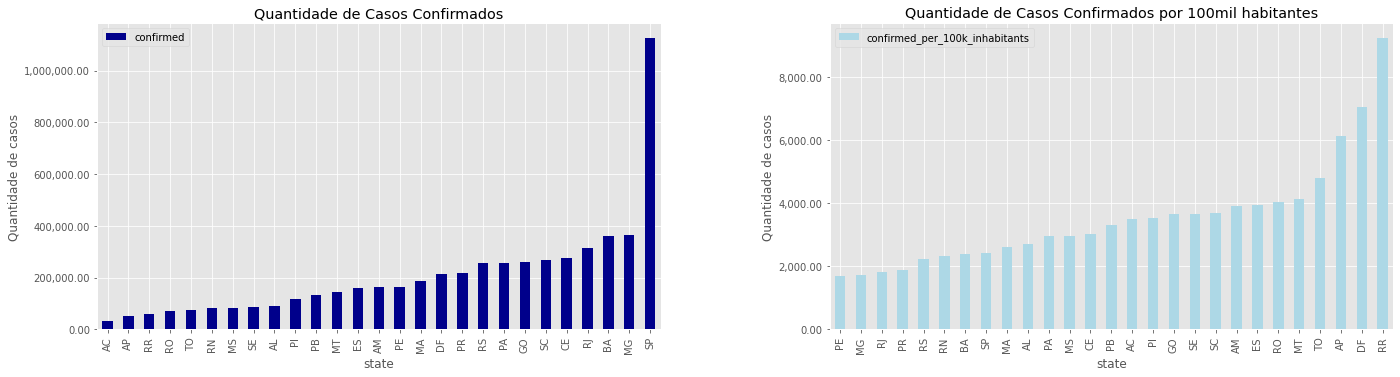

In [579]:
fig, axs = plt.subplots(1, 2, figsize=(20,5))

dados_estado_islast['confirmed'].plot(ax = axs[0], kind='bar', color='darkblue')
axs[0].set_title('Quantidade de Casos Confirmados')
axs[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
axs[0].set_ylabel('Quantidade de casos')
axs[0].legend(loc='best')
axs[0].set_ylim(bottom = 0)

dados_estado_islast['confirmed_per_100k_inhabitants'].sort_values(ascending=True).plot(ax = axs[1], kind='bar', color='lightblue')
axs[1].set_title('Quantidade de Casos Confirmados por 100mil habitantes')
axs[1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
axs[1].set_ylabel('Quantidade de casos')
axs[1].legend(loc='best')
axs[1].set_ylim(bottom = 0)

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,hspace=0.4, wspace=0.3)

plt.show()

**Comentário:** Quando comparado o número de casos no Estado vs número de casos por 100mil habitantes, podemos observar que os Estados com maior quantitativo de casos, quando dividido pela sua população, na sua maioria não concentram os maiores quantitativos. Deste modo, a criticidade de termos um Estado com menos população e mais casos por 100mil habitantes é um sinal de alerta para o sistema de saúde da localidade. Pois o Estado muito provavelmente não estará em condições de atender a demanda, visto que com uma população pequena, o número de leitos tende a ser menor.

Estados da região Norte, como Roraima e Amapá, apesar de estarem nos menores números de casos, estão nos maiores concentrados por 100mil habitantes. Já São Paulo, líder disparado em casos, é o 8° quando se trata em concentração por 100mil habitantes. 

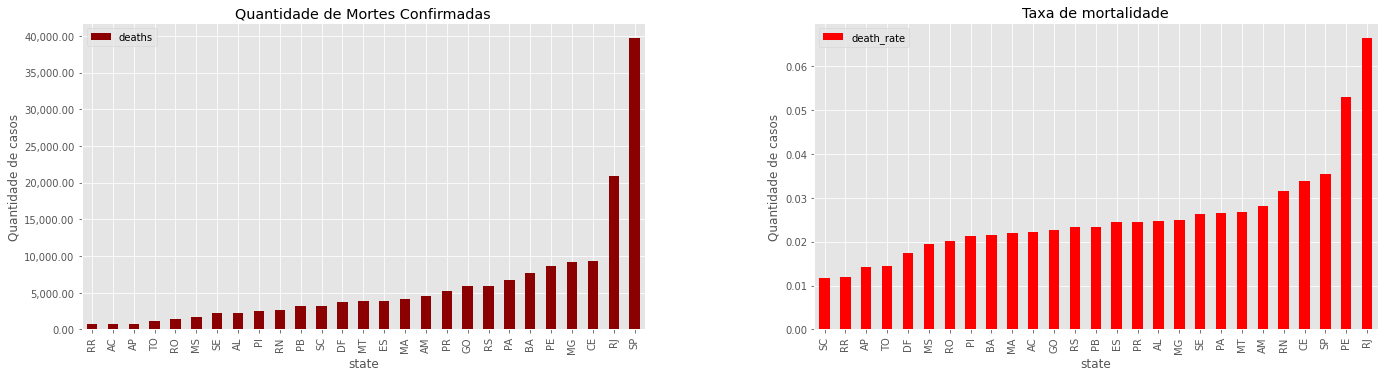

In [580]:
fig, axs = plt.subplots(1, 2, figsize=(20,5))

dados_estado_islast['deaths'].sort_values(ascending=True).plot(ax = axs[0], kind='bar', color='darkred')
axs[0].set_title('Quantidade de Mortes Confirmadas')
axs[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
axs[0].set_ylabel('Quantidade de casos')
axs[0].legend(loc='best')
axs[0].set_ylim(bottom = 0)

dados_estado_islast['death_rate'].sort_values(ascending=True).plot(ax = axs[1], kind='bar', color='red')
axs[1].set_title('Taxa de mortalidade')
axs[1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
axs[1].set_ylabel('Quantidade de casos')
axs[1].legend(loc='best')
axs[1].set_ylim(bottom = 0)

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,hspace=0.4, wspace=0.3)

plt.show()

**Comentário:** Referente ao número de mortos, a tendência de um Estado ter uma taxa de mortalidade alta está significativamente relacionada com o quantitativo de mortes.

**Acompanhamento do Total de casos e mortes por Estado na posição do dia 06-11-2020**

In [581]:
dados_agrupado_casos = pd.DataFrame(dados_estado.groupby('date').sum(['confirmed','deaths']))
dados_agrupado_casos = dados_agrupado_casos[['confirmed','deaths']].reset_index()
dados_agrupado_casos['Mes'] = dados_agrupado_casos['date'].dt.month
dados_agrupado_casos.set_index('date', inplace=True)
dados_agrupado_casos.tail(5)

,confirmed,deaths,Mes
date,,,
2020-11-01,5547951,160175,11
2020-11-02,5556200,160339,11
2020-11-03,5570782,160628,11
2020-11-04,5541266,160495,11
2020-11-05,5263129,155053,11


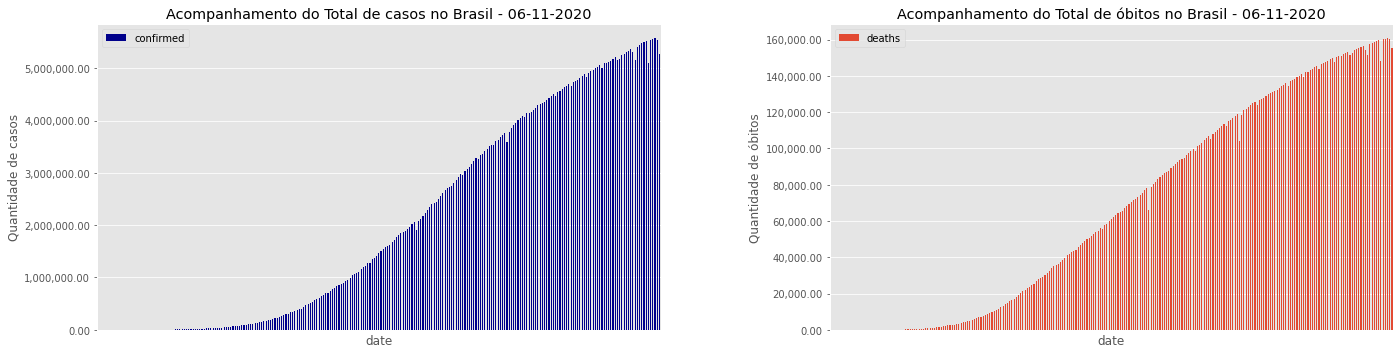

In [582]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

fig, axs = plt.subplots(1, 2, figsize=(20,5))

dados_agrupado_casos['confirmed'].plot(ax = axs[0], kind='bar', color='darkblue')
axs[0].set_title('Acompanhamento do Total de casos no Brasil - 06-11-2020')
axs[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
axs[0].xaxis.set_major_locator(ticker.NullLocator())
axs[0].set_ylabel('Quantidade de casos')
axs[0].legend(loc='best')
axs[0].set_ylim(bottom = 0)

dados_agrupado_casos['deaths'].plot(ax = axs[1], kind='bar')
axs[1].set_title('Acompanhamento do Total de óbitos no Brasil - 06-11-2020')
axs[1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
axs[1].xaxis.set_major_locator(ticker.NullLocator())
axs[1].set_ylabel('Quantidade de óbitos')
axs[1].legend(loc='best')
axs[1].set_ylim(bottom = 0)

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,hspace=0.4, wspace=0.3)

plt.show()

**Comentário:** O Brasil não demonstrou uma curva de estabilidade longeva de número de casos, apesar de haver a diminuição de novos casos (como mostra a imagem retirada do https://covid.saude.gov.br/) 

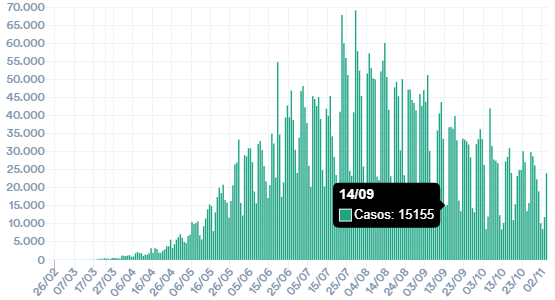

**Criando coluna de 'novos casos' e 'novas mortes'. O cálculo será o valor da linha subtraido pela linha abaixo.**

In [583]:
dados_estado['novos_casos']=0
dados_estado['novas_mortes']=0
i=0
j=1

for estado in dados_estado['state']:
  if j < len(dados_estado):
    if dados_estado['order_for_place'][i]==1:
      dados_estado['novos_casos'][i] = 0
      dados_estado['novas_mortes'][i]=0
      i=i+1
      j=j+1
    else:
      dados_estado['novos_casos'][i] = dados_estado['confirmed'][i] - dados_estado['confirmed'][j]
      dados_estado['novas_mortes'][i] = dados_estado['deaths'][i] - dados_estado['deaths'][j]
      i=i+1
      j=j+1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/i

In [584]:
#Testando o campo criado
dados_estado[['date','state','confirmed','novos_casos','deaths','novas_mortes']].tail(30)

,date,state,confirmed,novos_casos,deaths,novas_mortes
6305,2020-03-27,SP,1223,171,68,10
6306,2020-03-26,SP,1052,190,58,10
6307,2020-03-25,SP,862,52,48,8
6308,2020-03-24,SP,810,65,40,10
6309,2020-03-23,SP,745,114,30,8
6310,2020-03-22,SP,631,235,22,7
6311,2020-03-21,SP,396,0,15,6
6312,2020-03-20,SP,396,110,9,4
6313,2020-03-19,SP,286,46,5,2
6314,2020-03-18,SP,240,76,3,2


**Acompanhamento dos Novos Casos e Óbitos no Brasil - até 06-11-2020**

In [585]:
dados_agrupado_novos_casos = pd.DataFrame(dados_estado.groupby('date').sum(['novos_casos','novas_mortes']))
dados_agrupado_novos_casos = dados_agrupado_novos_casos[['novos_casos','novas_mortes']].reset_index()
dados_agrupado_novos_casos['Mes'] = dados_agrupado_novos_casos['date'].dt.month
dados_agrupado_novos_casos.set_index('date', inplace=True)
dados_agrupado_novos_casos.tail(5)

,novos_casos,novas_mortes,Mes
date,,,
2020-11-01,10188,203,11
2020-11-02,8249,164,11
2020-11-03,14582,289,11
2020-11-04,23316,618,11
2020-11-05,22378,593,11


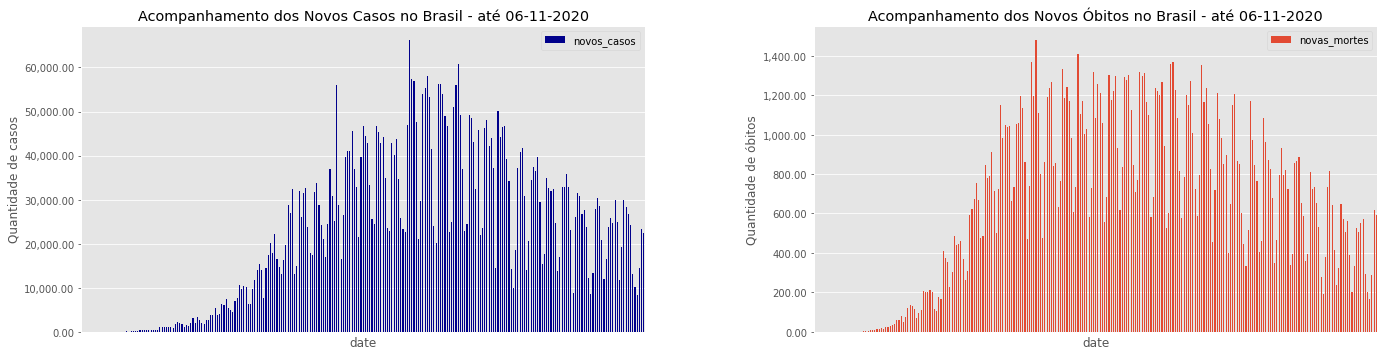

In [586]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

fig, axs = plt.subplots(1, 2, figsize=(20,5))

dados_agrupado_novos_casos['novos_casos'].plot(ax = axs[0], kind='bar', color='darkblue')
axs[0].set_title('Acompanhamento dos Novos Casos no Brasil - até 06-11-2020')
axs[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
axs[0].xaxis.set_major_locator(ticker.NullLocator())
axs[0].set_ylabel('Quantidade de casos')
axs[0].legend(loc='best')
axs[0].set_ylim(bottom = 0)

dados_agrupado_novos_casos['novas_mortes'].plot(ax = axs[1], kind='bar')
axs[1].set_title('Acompanhamento dos Novos Óbitos no Brasil - até 06-11-2020')
axs[1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
axs[1].xaxis.set_major_locator(ticker.NullLocator())
axs[1].set_ylabel('Quantidade de óbitos')
axs[1].legend(loc='best')
axs[1].set_ylim(bottom = 0)

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,hspace=0.4, wspace=0.3)

plt.show()

**Avaliando o quantitativo de Novos Casos e Novos Óbitos que são outliers (acima do 3° quartil na distribuição do BoxPlot abaixo) a nível Nacional, ou seja, os valores serão comparados com todos os Estados.**

Exemplificarei outlier por Estado selecionando 2 Estados. Deste modo, um outlier a "nível Estadual" pode não ser outlier a "a nível Nacional", uma vez que as medianas irão mudar a depender do conjunto de dados.

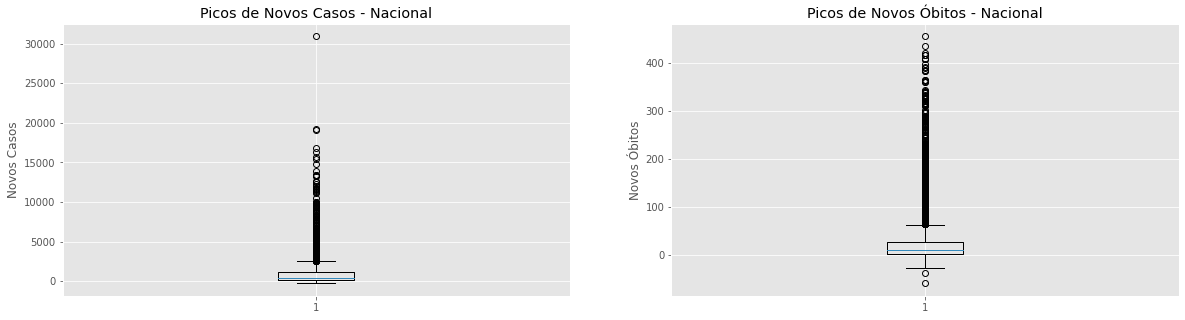

In [587]:
fig, axs = plt.subplots(1, 2, figsize=(20,5))

axs[0].boxplot(dados_estado['novos_casos'])
axs[0].set_title("Picos de Novos Casos - Nacional")
axs[0].set_ylabel('Novos Casos');

axs[1].boxplot(dados_estado['novas_mortes'])
axs[1].set_title("Picos de Novos Óbitos - Nacional")
axs[1].set_ylabel('Novos Óbitos');

No *'olhômetro*' estimei que os outliers dos Novos Casos são aproximadamente acima de 2.500. Já os de Novos Óbitos, são os valores aproximadamente acima de 70

In [588]:
#Identificando o quantitativo de casos 'acima do comum'
print("Quantidade de novos casos outliers:",dados_estado['state'][dados_estado['novos_casos'] > 2500].count())
print("Quantidade de novos ótibos outliers:",dados_estado['state'][dados_estado['novas_mortes'] > 70].count())

Quantidade de novos casos outliers: 477
Quantidade de novos ótibos outliers: 503


In [589]:
#Separando os resultados outliers
dados_outliers_casos = dados_estado[dados_estado['novos_casos'] > 2500]
dados_outliers_casos.head(5)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,novos_casos,novas_mortes
368,2020-06-22,AP,NaN,state,24862,372,94,False,845731.00,861773.00,16.00,2884.98,0.01,3022,13
583,2020-07-07,AM,NaN,state,79167,2952,113,False,4144597.00,4207714.00,13.00,1881.47,0.04,2740,14
622,2020-05-29,AM,NaN,state,38909,2011,74,False,4144597.00,4207714.00,13.00,924.71,0.05,2763,47
623,2020-05-28,AM,NaN,state,36146,1964,73,False,4144597.00,4207714.00,13.00,859.04,0.05,2638,73
1008,2020-08-25,DF,NaN,state,153690,2344,171,False,3015268.00,3055149.00,53.00,5030.52,0.02,3171,28


Quantidade de Outliers por Estado

In [590]:
dados_estados_outliers_casos = pd.DataFrame(dados_outliers_casos.set_index('state').groupby('state')['date'].count().sort_values(ascending=False))
dados_estados_outliers_casos.rename(columns={'date': 'Qtd Outliers'}, inplace = True)
dados_estados_outliers_casos

,Qtd Outliers
state,
SP,145
MG,69
BA,51
GO,47
RJ,40
RS,34
CE,28
SC,26
PA,18


**Comentário:** Alguns Estados não tiveram picos significativos a nível Nacional (tais como PE, PB, AC e MT), mantendo um crescimento de casos de forma gradativa e possivelmente diminuindo a possibilidade de esgotamento das UTIs de forma descontrolada.

Quantidade de Outliers por Mês

In [591]:
dados_mes_outliers_casos = pd.DataFrame(dados_outliers_casos.groupby(dados_outliers_casos['date'].dt.month)['state'].count().sort_values(ascending=False))
dados_mes_outliers_casos.rename(columns={'state': 'Qtd Outliers'}, inplace = True)
dados_mes_outliers_casos

,Qtd Outliers
date,
8,130
7,110
9,81
6,70
10,50
5,30
11,5
4,1


**Comentário:** Os principais meses com picos significativos de casos foram Julho, Agosto e Setembro, tendo uma tendência, pelo menos até o dia 06-11-2020, de diminuição destes casos.

In [592]:
dados_mes_outliers_casos_2 = dados_mes_outliers_casos.reset_index().sort_values('date')
dados_mes_outliers_casos_2 = dados_mes_outliers_casos_2.set_index('date')

Número de Casos acima do comum (outliers) por Estado e por Mês

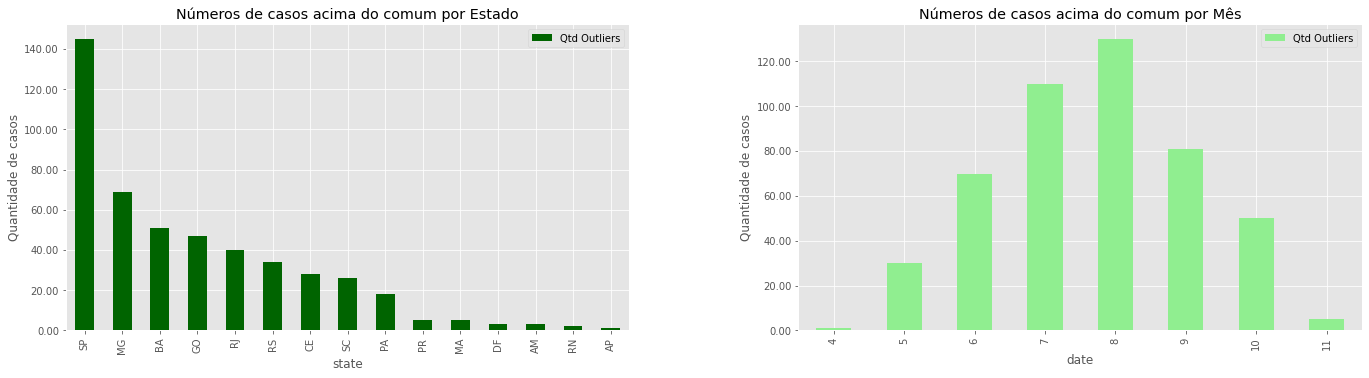

In [593]:
fig, axs = plt.subplots(1, 2, figsize=(20,5))

dados_estados_outliers_casos['Qtd Outliers'].plot(ax = axs[0], kind='bar', color='darkgreen')
axs[0].set_title('Números de casos acima do comum por Estado')
axs[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
axs[0].set_ylabel('Quantidade de casos')
axs[0].legend(loc='best')
axs[0].set_ylim(bottom = 0)

dados_mes_outliers_casos_2['Qtd Outliers'].plot(ax = axs[1], kind='bar', color='lightgreen')
axs[1].set_title('Números de casos acima do comum por Mês')
axs[1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
axs[1].set_ylabel('Quantidade de casos')
axs[1].legend(loc='best')
axs[1].set_ylim(bottom = 0)

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,hspace=0.4, wspace=0.3)

plt.show()

**Comparação de Outliers em Pernambuco e São Paulo**

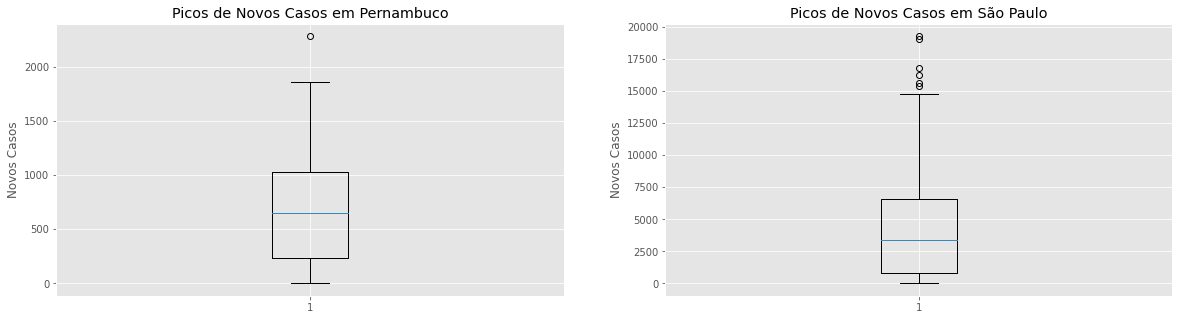

In [594]:
dados_pe = dados_estado[dados_estado['state']=='PE']
dados_sp = dados_estado[dados_estado['state']=='SP']

fig, axs = plt.subplots(1, 2, figsize=(20,5))

axs[0].boxplot(dados_pe['novos_casos'])
axs[0].set_title("Picos de Novos Casos em Pernambuco")
axs[0].set_ylabel('Novos Casos');

axs[1].boxplot(dados_sp['novos_casos'])
axs[1].set_title("Picos de Novos Casos em São Paulo")
axs[1].set_ylabel('Novos Casos');

In [595]:
#Data do maior pico de Novos Casos no Estado de Pernambuco
dados_pe[dados_pe['novos_casos'] > 2000]

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,novos_casos,novas_mortes
3481,2020-05-16,PE,NaN,state,18488,1461,66,False,9557071.00,9616621.00,26.00,192.25,0.08,2279,80


In [596]:
#Data do maior pico de Novos Casos no Estado de São Paulo
dados_sp[dados_sp['novos_casos'] > 15000]

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,novos_casos,novas_mortes
6166,2020-08-13,SP,NaN,state,674455,26324,169,False,45919049.00,46289333.00,35.00,1457.04,0.04,19274,455
6167,2020-08-12,SP,NaN,state,655181,25869,168,False,45919049.00,46289333.00,35.00,1415.40,0.04,15619,298
6175,2020-08-04,SP,NaN,state,575589,23702,160,False,45919049.00,46289333.00,35.00,1243.46,0.04,15371,337
6185,2020-07-25,SP,NaN,state,479481,21517,150,False,45919049.00,46289333.00,35.00,1035.83,0.04,16263,311
6188,2020-07-22,SP,NaN,state,439446,20532,147,False,45919049.00,46289333.00,35.00,949.35,0.05,16777,361
6221,2020-06-19,SP,NaN,state,211658,12232,114,False,45919049.00,46289333.00,35.00,457.25,0.06,19030,386


**Comentáio:** Como podemos ver, se considerarmos somente os casos por Estado, Pernambuco possui um caso bastante 'acima do comum'. Foi no dia 16-05-2020 e foi registrado 2.279 novos casos. Na ocasião, o Estado registrou 18.488 casos de COVID-19 e 1.461 mortes. 

Já no Estado de São Paulo, líder de picos em anomalia no cenário Nacional, foram observados 6 momentos 'acima do comum' em registro de novos casos, sendo 3 em Agosto, 2 em Julho e 1 em Junho. Evidencia-se a curva de crescimento de casos entre Junho e Agosto, onde o número total de casos de COVID-19 triplicou, saindo de 211.658 no primeiro registro de pico (dia 19-06-2020) para 674.455 no último registro (dia 13-08-2020).